In [1]:
# =============================================================================
# Firefly Algorithm for Global Optimization on a Synthetic Chemistry-inspired Problem
# =============================================================================
# In many chemistry problems, one often encounters complex potential energy surfaces
# with multiple local minima. The Firefly Algorithm (FA) is a nature-inspired metaheuristic
# that uses the attractiveness and random movement of fireflies to effectively explore such
# landscapes. Here, we simulate a potential energy surface (using a modified Rastrigin function)
# and implement FA to find the global minimum, while visualizing the process in 3D.

# -----------------------------------------------------------------------------
# 1. Import Libraries and Set Up the Environment
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import random
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)


In [2]:

# -----------------------------------------------------------------------------
# 2. Define the Synthetic Potential Energy Surface (Objective Function)
# -----------------------------------------------------------------------------
def rastrigin_function(X):
    """
    Modified Rastrigin function in 2D.
    Often used as a benchmark for global optimization, it has a large number of local minima.

    Parameters:
        X (np.array): Array of shape (n,2) where each row is a point [x, y].

    Returns:
        np.array: Function values at the given points.
    """
    # Rastrigin function: f(x, y) = 20 + (x^2 - 10*cos(2*pi*x)) + (y^2 - 10*cos(2*pi*y))
    A = 10
    return 2 * A + (X[:,0]**2 - A * np.cos(2 * np.pi * X[:,0])) + (X[:,1]**2 - A * np.cos(2 * np.pi * X[:,1]))

# For minimization, we want to maximize brightness. Here, we define brightness as:
def brightness(X):
    """
    Convert objective function value to brightness.
    Higher brightness corresponds to lower function value.

    Using: brightness = 1/(1 + f(x))

    Parameters:
        X (np.array): Array of shape (n,2).

    Returns:
        np.array: Brightness values for each point.
    """
    f_vals = rastrigin_function(X)
    return 1.0 / (1.0 + f_vals)

# Define search space boundaries (inspired by chemical potential energy surface)
lb, ub = -5.12, 5.12  # Lower and upper bounds for both x and y

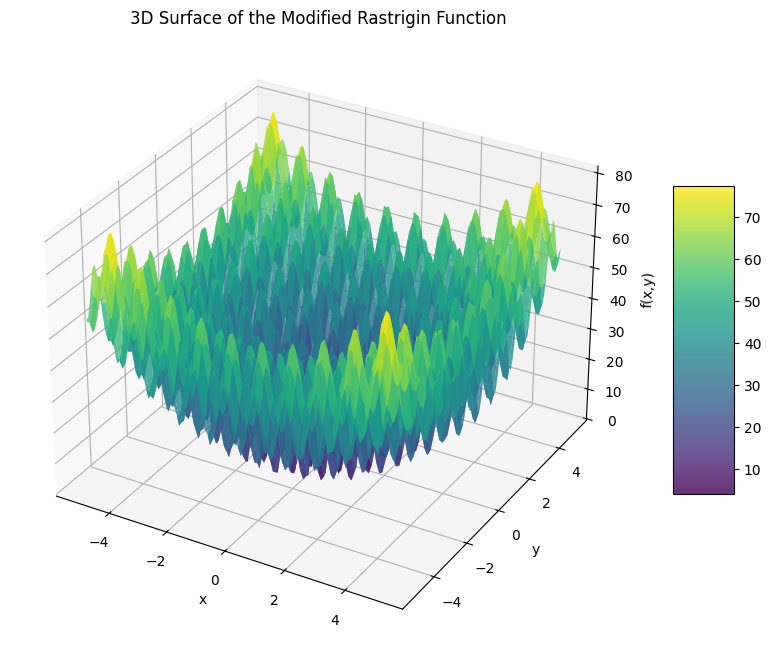

In [3]:
# -----------------------------------------------------------------------------
# 3. Visualize the 3D Surface of the Objective Function
# -----------------------------------------------------------------------------
# Create a grid of points over the search space
x_vals = np.linspace(lb, ub, 100)
y_vals = np.linspace(lb, ub, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]
Z_vals = rastrigin_function(grid_points).reshape(X_grid.shape)

# 3D Surface Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X_grid, Y_grid, Z_vals, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_title("3D Surface of the Modified Rastrigin Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [4]:
# -----------------------------------------------------------------------------
# 4. Implementing the Firefly Algorithm (FA)
# -----------------------------------------------------------------------------
# Firefly Algorithm parameters
num_fireflies = 40            # Number of fireflies (population size)
max_iterations = 50           # Number of iterations (generations)
alpha = 0.2                   # Randomness parameter (step size)
beta0 = 1.0                   # Base attractiveness
gamma = 1.0                 # Light absorption coefficient

def initialize_fireflies(n, dim=2):
    """
    Initialize fireflies with random positions within the search space.

    Parameters:
        n (int): Number of fireflies.
        dim (int): Dimensionality of the search space.

    Returns:
        np.array: Array of shape (n, dim) with positions.
    """
    return np.random.uniform(lb, ub, (n, dim))

def move_firefly(i, j, fireflies):
    """
    Move firefly i towards firefly j based on their relative brightness.

    Parameters:
        i (int): Index of the firefly to be moved.
        j (int): Index of the target firefly.
        fireflies (np.array): Current positions of all fireflies.

    Returns:
        np.array: Updated position for firefly i.
    """
    r_ij = np.linalg.norm(fireflies[i] - fireflies[j])
    beta = beta0 * np.exp(-gamma * r_ij**2)
    # Move firefly i towards j with randomization
    step = beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(2) - 0.5)
    new_position = fireflies[i] + step
    # Enforce bounds
    new_position = np.clip(new_position, lb, ub)
    return new_position


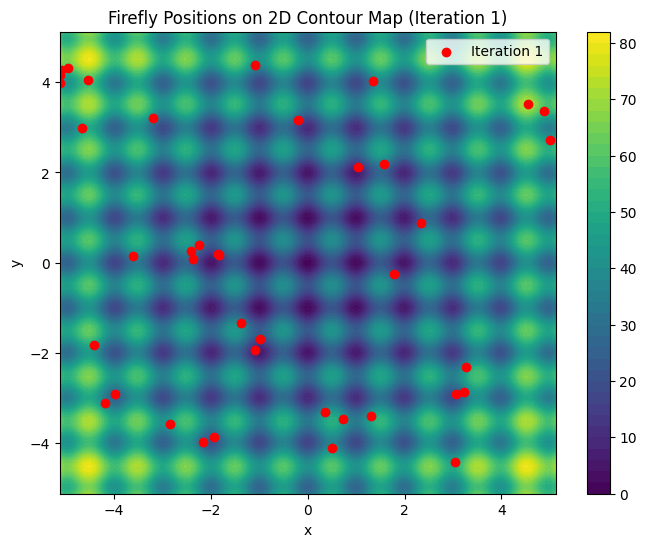

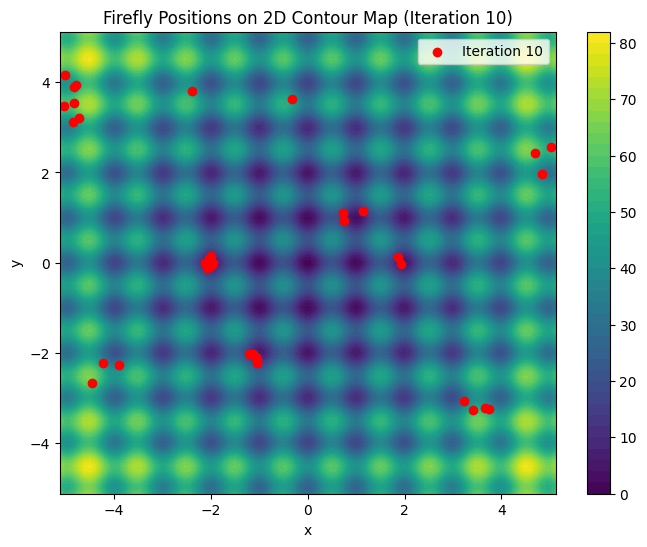

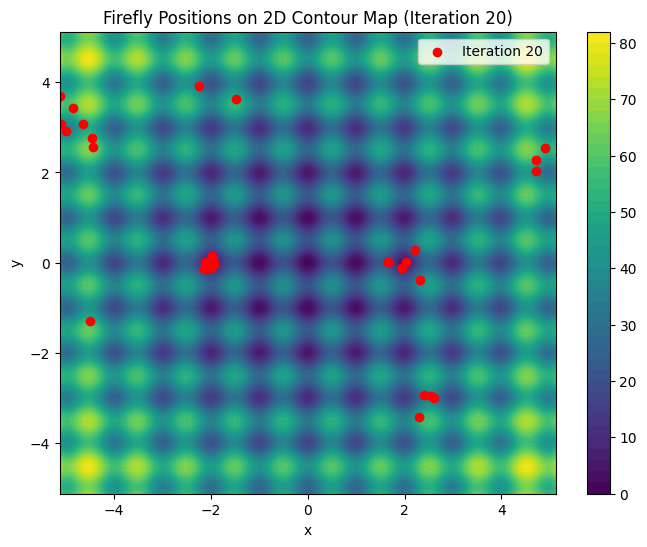

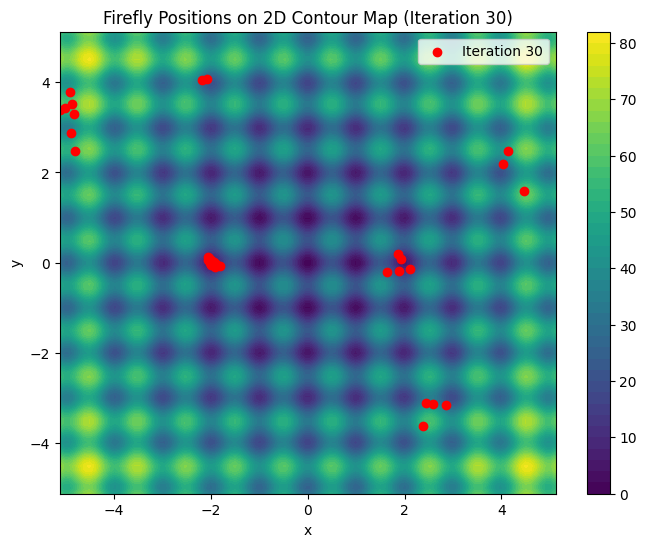

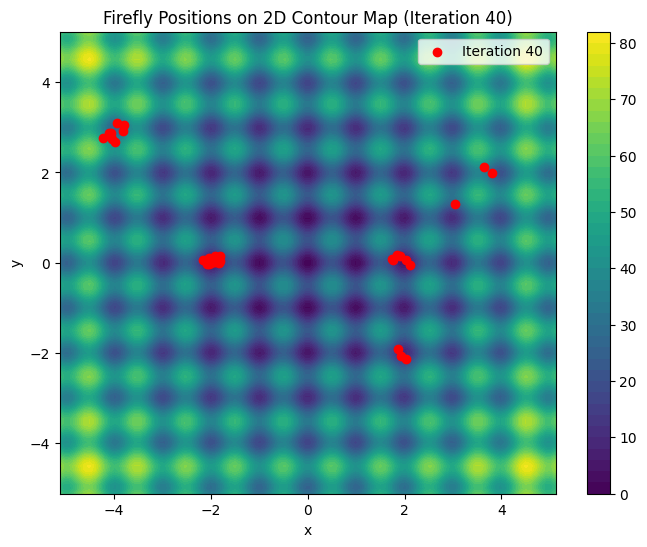

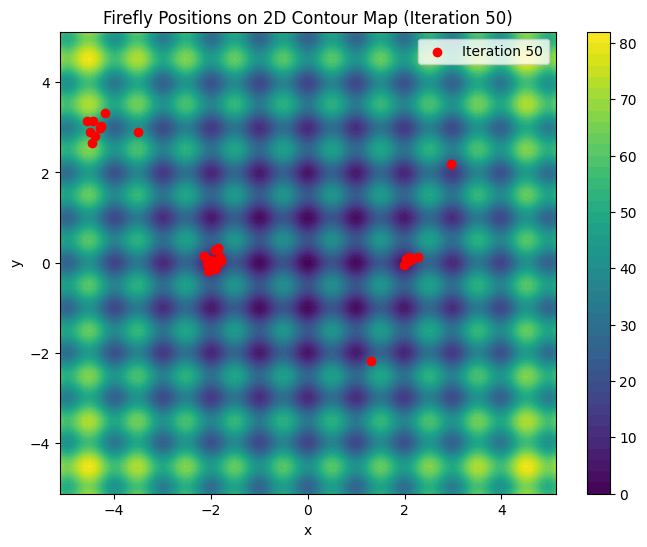

In [5]:
# -----------------------------------------------------------------------------
# 5. Main Loop of the Firefly Algorithm with Visualization
# -----------------------------------------------------------------------------
# Initialize fireflies
fireflies = initialize_fireflies(num_fireflies)
best_brightness_history = []  # Track best brightness in each iteration
fireflies_history = []        # Record positions for visualization

for iteration in range(max_iterations):
    # Record current positions for visualization
    fireflies_history.append(fireflies.copy())

    # Evaluate brightness for all fireflies
    current_brightness = brightness(fireflies)

    # Record best brightness (maximum brightness, which means lowest f(x,y))
    best_brightness_history.append(np.max(current_brightness))

    # Update positions: For each pair of fireflies, move the less bright one toward the brighter one
    for i in range(num_fireflies):
        for j in range(num_fireflies):
            if current_brightness[j] > current_brightness[i]:
                fireflies[i] = move_firefly(i, j, fireflies)

    # Plot intermediate positions every 10 iterations
    if (iteration + 1) % 10 == 0 or iteration == 0:
        plt.figure(figsize=(8, 6))
        # Plot the 3D surface in a contour style (2D projection) for clarity
        plt.contourf(X_grid, Y_grid, Z_vals, levels=50, cmap='viridis')
        plt.colorbar()
        plt.scatter(fireflies[:, 0], fireflies[:, 1], c='r', marker='o', label=f'Iteration {iteration+1}')
        plt.title(f"Firefly Positions on 2D Contour Map (Iteration {iteration+1})")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()



Best firefly found at position: [-1.99160171 -0.00280131]
Objective function value (f): 3.9819532677069525


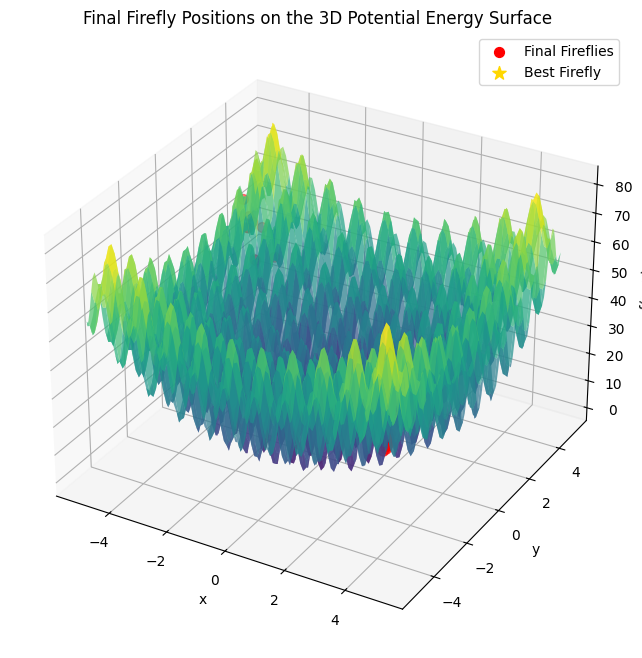

In [6]:
# -----------------------------------------------------------------------------
# 6. Final Visualization: Firefly Positions on 3D Surface
# -----------------------------------------------------------------------------
final_brightness = brightness(fireflies)
best_index = np.argmax(final_brightness)
best_firefly = fireflies[best_index]
print("\nBest firefly found at position:", best_firefly)
print("Objective function value (f):", rastrigin_function(np.array([best_firefly]))[0])

# 3D plot overlaying final firefly positions on the potential energy surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_vals, cmap='viridis', alpha=0.7, edgecolor='none')
ax.scatter(fireflies[:, 0], fireflies[:, 1], rastrigin_function(fireflies),
           color='r', s=50, label='Final Fireflies')
ax.scatter(best_firefly[0], best_firefly[1], rastrigin_function(np.array([best_firefly])),
           color='gold', s=100, label='Best Firefly', marker='*')
ax.set_title("Final Firefly Positions on the 3D Potential Energy Surface")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()
plt.show()

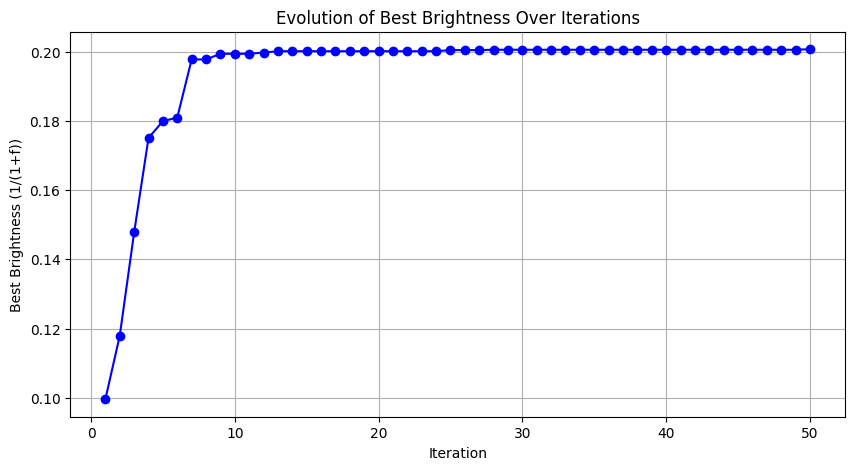

In [7]:
# -----------------------------------------------------------------------------
# 7. Plot the Evolution of the Best Brightness Over Iterations
# -----------------------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_iterations+1), best_brightness_history, marker='o', linestyle='-', color='blue')
plt.title("Evolution of Best Brightness Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Best Brightness (1/(1+f))")
plt.grid(True)
plt.show()


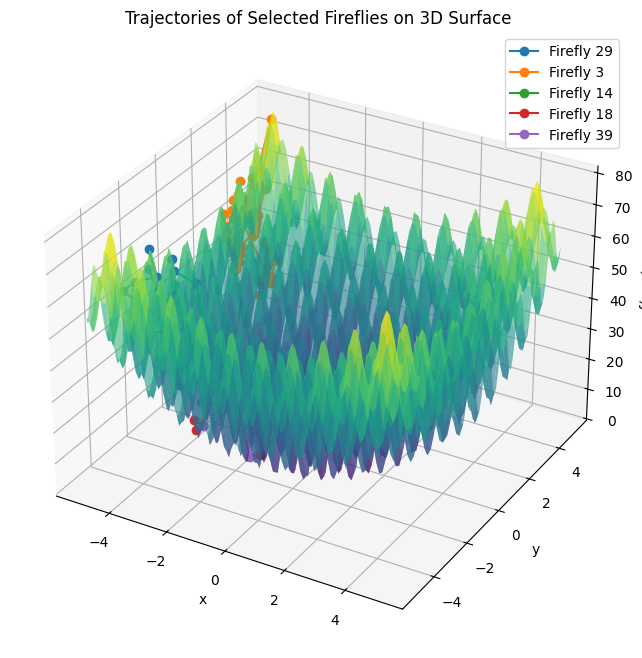

In [8]:
# -----------------------------------------------------------------------------
# 8. Additional Visualization: Trajectories of a Subset of Fireflies in 3D
# -----------------------------------------------------------------------------
# For enhanced visualization, we plot trajectories of a few fireflies over iterations on the 3D surface.
num_traj = 5  # Number of firefly trajectories to plot
indices = np.random.choice(range(num_fireflies), num_traj, replace=False)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_vals, cmap='viridis', alpha=0.6, edgecolor='none')

for idx in indices:
    traj = np.array([fireflies_history[it][idx] for it in range(max_iterations)])
    # Evaluate the function values along the trajectory for z-axis
    traj_z = rastrigin_function(traj)
    ax.plot(traj[:, 0], traj[:, 1], traj_z, marker='o', label=f'Firefly {idx}')

ax.set_title("Trajectories of Selected Fireflies on 3D Surface")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()
plt.show()

In [9]:
# -----------------------------------------------------------------------------
# 9. Summary of Results
# -----------------------------------------------------------------------------
print("\nFinal Best Firefly Position:", best_firefly)
print("Minimum Objective Function Value (f):", rastrigin_function(np.array([best_firefly]))[0])



Final Best Firefly Position: [-1.99160171 -0.00280131]
Minimum Objective Function Value (f): 3.9819532677069525
